# Linear Regression

## Table of Contents

- ### Linear Regression Introduction
- ### Normal Equation
  - #### Python code 
  - #### Graphs plotting
  - #### Mathematical derivations
- ### Linear Regression with batch gradient descent
- ### Linear Regression with stochastic gradient descent
- ### Linear Regression with mini-batch gradient descent
- ### Polynomial Regression

- ### Regularised models
 - #### Ridge Regression
 - #### Lasso Regression

- ### Logistic Regression

- ### Projects
- ### Mathematical derivations and explanations
- ### Python coding exercises
- ### Graph plotting using matplotlib


# Linear Regression

- Simple linear regression finds relationship between two independent random variables. One is predictor or independent variable and other is response or dependent variable.

- It is expressed by a best-fit line; a line that best fits the data. 
- The best fit line is the one for which total prediction error (all data points) are as small as possible. Error is the distance between the point to the regression line.

## Example

We have a dataset which contains information about relationship between *‘number of hours studied’* and *‘marks obtained’.*
Many students were observed and their hours of study and grade were recorded. This constitutes our training data. 

** Goal is to design a model that can predict marks if given the number of hours studied.**

Using the training data, a regression line is obtained which will give minimum error. This linear equation is then used for any new data. That is, if we give number of hours studied by a student as an input, our model should predict their mark with minimum error.

Y(pred) = b0 + b1*x

The values b0 and b1 must be chosen so that they minimize the error. 
***If sum of squared error is taken as a metric to evaluate the model, then goal to obtain a line that best reduces the error.***


![1](https://cdn-images-1.medium.com/max/1600/1*Utp8sgyLk7H39qOQY9pf1A.png)


#### For model with one predictor,

![](https://cdn-images-1.medium.com/max/1600/1*1evY0PuCUENCpDP_QRplig.png)

![1](https://cdn-images-1.medium.com/max/1600/1*Cx1Yej9zLVI1O16I3mODqA.png)

#### Exploring the relationship

1. If b1 > 0, then x(predictor) and y(target) have a positive relationship. That is increase in x will increase y.
2. If b1 < 0, then x(predictor) and y(target) have a negative relationship. That is increase in x will decrease y.


$$life\_statisfaction = \theta_0 + \theta_1 \space X \space GDP\_per\_capita$$

Where $\theta_0$ and $\theta_1$ are model parameters.

#### Linear Regression model prediction 

$$\hat{y}=\theta_0 + \theta_1 x_1 + \theta_2 x_2 + ......... + \theta_n x_n $$

#### Linear Regression vector form

$$\hat{y}=h_{\theta}(x)=\theta.x$$

### How do we train the model

- #### Training the model means settings its parameters so that it best fits the training data.

- #### One of the performance measures to determine the 'best fit' is the Root mean square error ( RMSE ).

#### Therefore to train a regression you must find a $\theta$ that minimises the RMSE.

- In practice it is easier to minimise the Mean square error (MSE) than the RMSE and it leads to the same results. So we minimise the MSE

### Cost function for a linear regression model

$$ MSE(X,h_{\theta}) = \frac{1}{m} \sum^m_{i=1}( \theta.x^{(i)}- y^{(i)})^2$$

### The Normal equations



To find $\theta$ that minimises the cost function there is a closed-form solution, or a direct solution known as ** Normal Equation **.

$$\hat{\theta} = (X^T.X)^{-1}.X^T.y$$

Where:

- $\hat{\theta}$ is the minimised $\theta$
- y is the vector of target values.



### Python Code

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "linear_regression"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "graphs", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

### Normal Equation


In [2]:
x = np.random.randn(2,1)
print(x)

x = np.linspace(0,1,10).reshape(10,1)
print(x)

[[ 0.49671415]
 [-0.1382643 ]]
[[0.        ]
 [0.11111111]
 [0.22222222]
 [0.33333333]
 [0.44444444]
 [0.55555556]
 [0.66666667]
 [0.77777778]
 [0.88888889]
 [1.        ]]


In [3]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.linspace(-1,1,100).reshape(100,1)
print("Stats(min, max, mean) X=", np.min(X), np.max(X), np.mean(X))
print("Stats(min, max, mean) y=", np.min(y), np.max(y), np.mean(y))
print(y.shape)


Stats(min, max, mean) X= 0.011044234247204798 1.9737738732010346 0.9272131901902835
Stats(min, max, mean) y= 3.2851231273909764 10.274856973138457 6.781639570570849
(100, 1)


Saving figure generated_data_plot


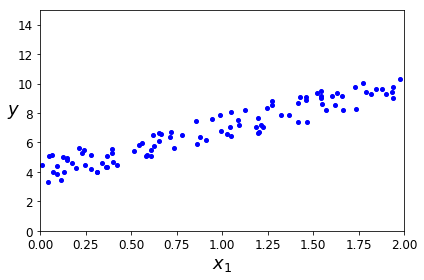

In [4]:
# For MatplotLib check: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
#plt.plot(X, y, "b.")

plt.plot(X, y, color='blue', marker='.', linestyle='None', linewidth=2, markersize=8)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

In [7]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)


In [8]:
print("Theta Normal Equation=", theta_best, theta_best.ndim, theta_best.shape)

Theta Normal Equation= [[3.97476864]
 [3.02721204]] 2 (2, 1)


In [9]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = (X_new_b).dot(theta_best)
print("Y predicted = ", y_predict)

y_actual = 4 + 3*X_new

print("Y Actual = ", y_actual)
print("Residual = ", y_predict-y_actual)

Y predicted =  [[ 3.97476864]
 [10.02919271]]
Y Actual =  [[ 4]
 [10]]
Residual =  [[-0.02523136]
 [ 0.02919271]]


In [11]:
x = np.random.rand(2,1)
print(x)


[[0.31435598]
 [0.50857069]]
[[0]
 [2]]


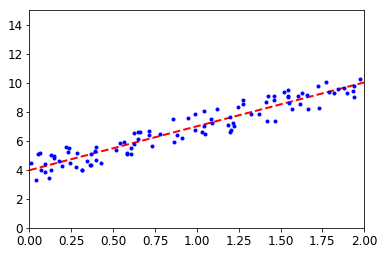

In [15]:
plt.plot(X_new, y_predict, color="red", linestyle="dashed", linewidth=2)
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.97476864]), array([[3.02721204]]))

In [17]:
lin_reg.predict(X_new)

array([[ 3.97476864],
       [10.02919271]])

The `LinearRegression` class is based on the `scipy.linalg.lstsq()` function (the name stands for "least squares"), which you could call directly:

In [18]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd, residuals, rank, s

(array([[3.97476864],
        [3.02721204]]),
 array([33.98085446]),
 2,
 array([14.27481167,  4.14139788]))

### Normal Equation Time Complexity

- #### It computes inverse of $X^T.X$ where $X$ is an n x n matrix.
- #### Complexity for inversing nxn matrix is $O(n^3)$.
- #### In other if we double the number of features then complexity will increase by 2^3 = 8 times.

- It is linear with regards to the size of dataet. So it handles large dataets easily.

#### Normal equation should not be used when the number of features is large.

# Other ways to find the best fit linear regression parameters

## Gradient Descent Optimisation

- Gradient descent is a general optimisation algorithm to find optimal solutions to a wide range of problems.
- It tweaks parameters iteratively in order to minimise the cost function.

### How it works

- It measures the local gradient of the error function ( or the cost function ) with respect to the parameter $\theta$ and then,
- Goes in the direction of the descending gradient.
- Once the gradient is zero, you have reached the minimum.

- Initialise $\theta$ with random values.
- Improve it step by step by attempting to decrease the cost function.
- Continue till the algorithm converges to the minimum.

#### An important parameter in the Gradient descent is the size of the step. This step size is called the Learning rate.

- If the learning rate is too small, the algorithm will converge slowly.
- If the learning rate is too high then you the algorithm will keep jumping from one end to another of the cost function curve.

#### Some cost function curves not just have a global minimum but also local minima !!
#### MSE has just a global minima so easier to optimise. 
   - It is also convex i.e if we pick any points on the curve then the line segment joining them never crosses the curve


## Linear regression using batch gradient descent

- Gradient is - How much the cost function wil change if we change $\theta_j$ by a small amount. This is also called the *** partial derivative ***
- $\eta$ is the learning rate.

- #### Batch Gradient descent uses the whole batch ( complete dataset ) to computer the error and then updates the $\theta$ accordingly.


### Partial derivative of the cost function

$$ \frac{\partial  MSE(\theta) }{\partial { \theta_j} } \space = \space \frac {2} {m} \sum^m_{i=1} ( \theta^T.x^{(i)} - y^{(i)} ) x^{(i)}_j$$

### Gradient vector of the cost function


$$\nabla_\theta MSE ( \theta ) = 
\begin{bmatrix}
\frac{\partial}{\partial \theta_0 } MSE (\theta ) \\ 
\frac{\partial}{\partial \theta_1 } MSE (\theta ) \\
\frac{\partial}{\partial \theta_2 } MSE (\theta ) \\
....... \\
\frac{\partial}{\partial \theta_j } MSE (\theta ) \\
....... \\
\frac{\partial}{\partial \theta_n } MSE (\theta ) 
\end{bmatrix}
$$

OR

$$\nabla_\theta MSE ( \theta ) = \frac {2}{m} X^T.(X.\theta - y)$$

#### The final equation for updating $\theta$ is thus:

$$\theta_{t+1} = \theta_t \space- \space \eta \nabla MSE( \theta) \space\space\space $$

### Let's look at the implementtion

In [21]:
eta = 0.1
n_iterations = 1000
m = 100

## Initise the theta with a random value to begin with
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [22]:
print(theta)

[[3.97476864]
 [3.02721204]]


In [125]:
y_predict_gradient = X_new_b.dot(theta)
print(y_predict_gradient)

[[ 3.97476864]
 [10.02919271]]


In [23]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

Saving figure gradient_descent_plot


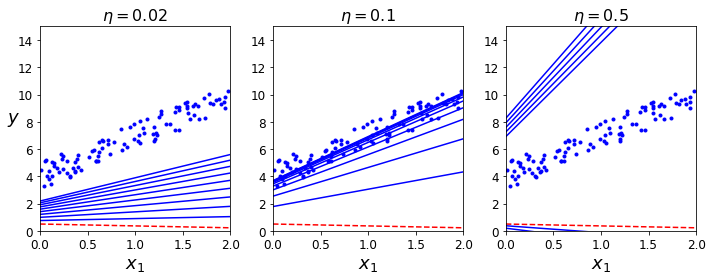

In [24]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

## Stochastic Gradient Descent


#### Main problem with batch gradient descent 
- It uses the whole training set to compute the gradient at each step.

#### Stochastic gradient descent handles the problem by picking a random instance from the training set for each step.

- Good point: This makes it pretty fast.
- Bad point: But at the same time is algorithm is much less regualar.
  - Instead of gradually moving towards the minima, it simply bounces back and forth till it reaches minima or some where close.
- Good point: Since is bounces back and forth so it good to escape local minima, but still is never stable
  - One solution is to gradually decrease the learning rate. 
  - The steps start large but gradually decrease allowing the algorithm to settle at a global minima.
  

In [31]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

Saving figure sgd_plot


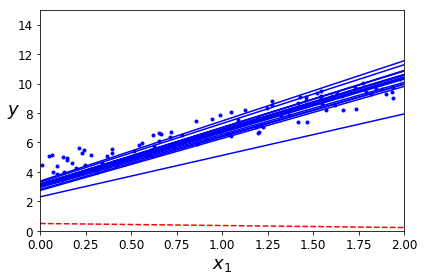

In [32]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
save_fig("sgd_plot")                                 # not shown
plt.show()                                           # not shown

In [33]:
print(theta)

[[3.97466757]
 [3.03220079]]


In [34]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=42, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [35]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.02316355]), array([3.07470423]))

## Mini Batch Gradient Descent

- Instead of chosing the complete batch or a random instance, it choses a random set of instances called as *** mini-batch.***

In [36]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [37]:
print(theta)

[[3.95222479]
 [3.01517366]]


In [38]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

### Comparision of all the three gradient descent algorithms

As you can see in the below diagram

- #### Only batch gradient descent actually stops at the minima where other two keep oscillating.


Saving figure gradient_descent_paths_plot


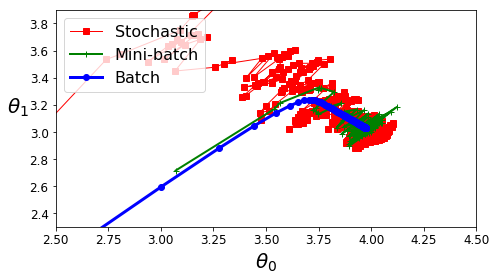

In [39]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()

## Polynomial Regression

In [53]:
import numpy as np
import numpy.random as rnd
import pandas as pd

np.random.seed(42)

In [67]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
#X = 6 * np.linspace(-3, 3, 100)
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
#y = 0.5 * X**2 + X + 2
print(X.__class__)
print(y.__class__)
fr = pd.DataFrame()
fr['x'] = X[:,0]
fr['y'] = y[:,0]
print(fr.head(30))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
           x         y
0   1.679106  5.063250
1  -2.762287  4.225557
2  -0.116958  2.433481
3  -2.370419  2.068410
4  -1.547730  2.421703
5   2.919976  6.334562
6  -2.145027  3.304309
7  -0.006671  0.253637
8   0.708934  2.597787
9   1.214790  2.832977
10  0.357892  1.127254
11 -2.941375  4.545295
12 -1.041232  1.033149
13  0.106270  2.458420
14 -2.472801  2.537651
15 -0.896238  1.982424
16 -2.800781  3.198229
17 -2.528529  1.385208
18 -0.618460  2.569053
19 -2.203705  1.730697
20  0.405245  0.930775
21  1.136790  3.354820
22  1.803520  6.930623
23 -1.799099  2.669501
24 -1.995105  1.646464
25 -2.372593  2.092748
26  0.818581  2.831984
27  1.238854  6.082982
28 -2.810483  3.520860
29  2.617273  8.472375


Saving figure quadratic_data_plot


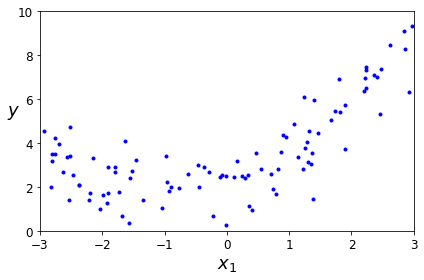

In [68]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_data_plot")
plt.show()

In [70]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])

[1.67910593]


In [71]:
print(X_poly[0])

[1.67910593 2.81939674]


In [73]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.1389313]), array([[0.90302579, 0.48814184]]))

Saving figure quadratic_predictions_plot


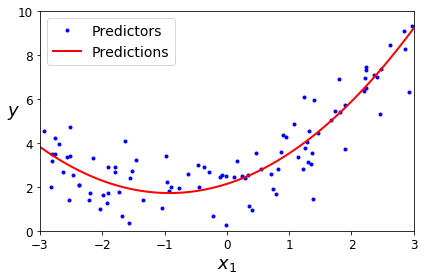

In [78]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.", label="Predictors")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_predictions_plot")
plt.show()

Saving figure high_degree_polynomials_plot


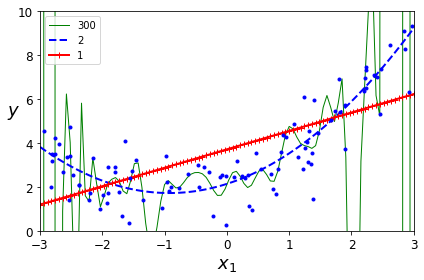

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("high_degree_polynomials_plot")
plt.show()

## Learning Curves

### How can you tell if you model is overfitting or undrfitting ?

- #### Overfitting - If a model performs well on the training data but generalises poorly according to cross-validation metrics.
- #### Underfitting - If it performs poorly on both.

Another way is to look at the *** learning curves ***.

- To generate the plot simply run the model several times on different sise training sets.
- They must converge. 
- If they have a gap them the model performs well on the training but not on the validation which becomes a case of overfitting.

Hence looking at the learning curve is a good to find the *** Overfitting or Underfitting ***.


In [80]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

Saving figure underfitting_learning_curves_plot


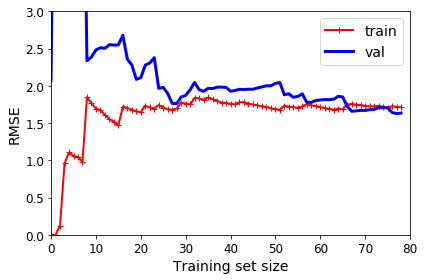

In [81]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
save_fig("underfitting_learning_curves_plot")   # not shown
plt.show()                                      # not shown

Saving figure learning_curves_plot


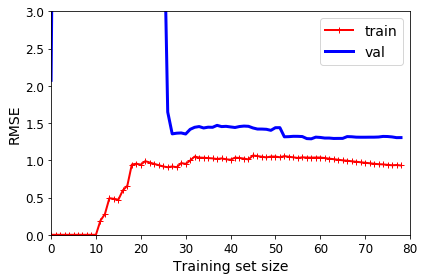

In [82]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
save_fig("learning_curves_plot")  # not shown
plt.show()                        # not shown

## Regularized Models

- A good way to reduce overfitting is to regularise the model.
- What is Regularise mean - It means to constrain the model, to decrease its degrees of freedom.
- The lesser is the degree of freedom the more difficult it will be for the model to overfit.
- A polynomial regression model can be constraint by decreasing it polynomial degree.

Linear Regression models are regularised via:

- Ridge regression
- Lasso regression

### Ridge Regression

It is a regularised version of linear regression.

- A regularisation term $\alpha\sum^n_{i=1} \theta^2_i$ is added to the cost function.

  - This forces the algorithm to fit the data.
  
  - And also to keep the weights as small as possible.
  
*** Note:*** The regularisatio term is added to the cost function during the training. 
Once the model is trained, the model's performance is evaluated using the unregularised performance measure.

- The hyperparameter $\alpha$ controls the regularisation.
  - If $\alpha = 0$ then ridge regression is just a linear regression.
  
### Ridge Regression cost function
 
$$ J(\theta) = MSE(\theta) + \alpha \frac{1}{2} \sum^n_{i=1} \theta^2_i $$

Saving figure ridge_regression_plot


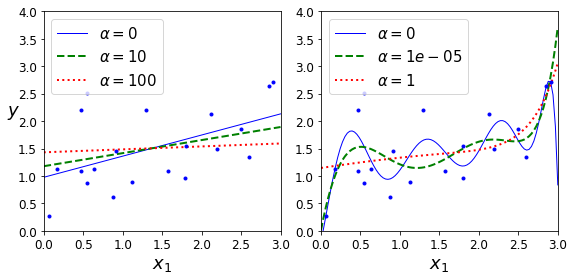

In [83]:
from sklearn.linear_model import Ridge

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

save_fig("ridge_regression_plot")
plt.show()

- *** Left figure: *** Ridge model trained on linear data for different $\alpha$ values.
- *** Right figure: *** Data is expanded using polynomial features, then scaled using StandardScaler and the Ridge regularisation is applied.
    

### Lasso Regression

It also adds a regularisation term to the cost function but uses the $l_1$ norm of the weight vector instead of half the square of the $l_2$ norm.

### Lasso regression cost function

$$ J(\theta) = MSE(\theta) + \alpha \sum^n_{i=1} |\theta_i| $$

### Important considerations

- Tends to completely eliminate the weights of least important features. ( sets them to 0 )

In [28]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.77621741])

## Early stopping

Saving figure early_stopping_plot


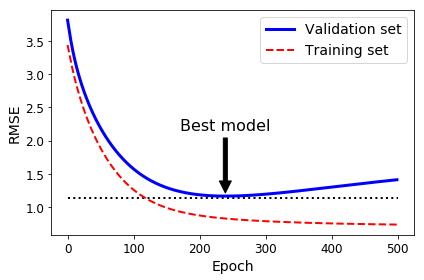

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
save_fig("early_stopping_plot")
plt.show()

## Logistic Regression

- A linear regression technique used for binary classification.
- It gives the probability whether a instance belongs to a class or not.
- If the probability is > 50% then it estimates that the instance belongs to the positive class or else it does not ( belongs to the negative class ).

### Logistic regression probability model ( vectorised form )

$$\hat{p} = \sigma(\theta^T.x)$$

The function $\sigma(.)$ is called the *** Logit Function*** or the *** Sigmoid Function***.

$$ \sigma(t) = \frac{1}{ 1 + e^{-t}}$$

#### Model prediction

$$ \hat{y} = 0 ; \space \space \hat{p} < 0.5 $$
OR
$$ \hat{y} = 1 ; \space \space \hat{p} > 0.5 $$

### Training and cost function

#### So how is the model trained ? What is its cost function ?

### Cost function of a single training instance

$$ c(\theta) = - log(\hat{p}) \space \space; y = 1 $$
OR
$$ c(\theta) = - log(1 - \hat{p}) \space \space; y = 0 $$

Saving figure logistic_function_plot


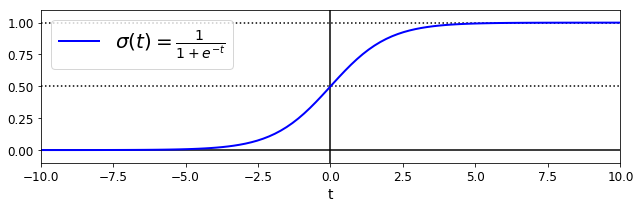

In [37]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
save_fig("logistic_function_plot")
plt.show()

### Logistics regression implementation on a IRIS dataset 

In [38]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [39]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [40]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

In [41]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

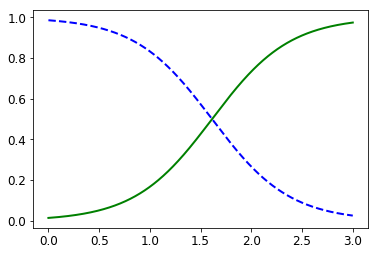

In [42]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")

Saving figure logistic_regression_plot


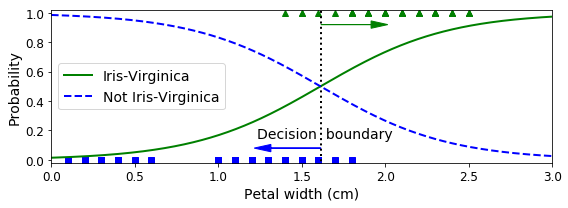

In [43]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
save_fig("logistic_regression_plot")
plt.show()

In [99]:
print(decision_boundary)

[1.61561562]


In [101]:
predicted = log_reg.predict([[1.7], [1.5]])
print(predicted)

[1 0]


Saving figure logistic_regression_contour_plot


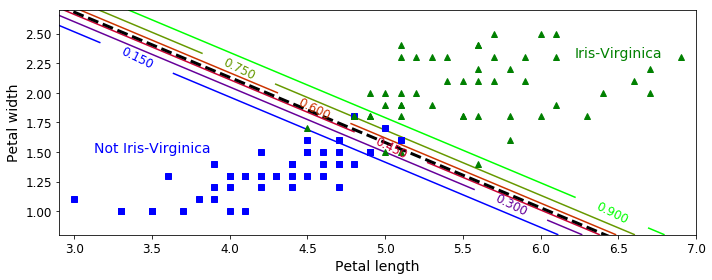

In [102]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
save_fig("logistic_regression_contour_plot")
plt.show()

## Softmax regression

Logistic regression model can be generalised to support multiple classes directly, without having to train multiple binary classifiers.

#### This is called softmax or multinomial regression

How does it work ?
- Given an instance the softmax regression model first computes a score $s_k(x)$ for each class $k$.
- It then estiamtes the probabilities of each class by applying a *** softmax function***.

#### Softmax score

$$ s_k(x) = \theta^{(k)}.x$$

- #### Note that each class has its own dedicated vector $\theta^{(k)}$

#### Softmax Function

$$\hat{p_k} = \frac{ e^{s_k(x)}} { \sum^k_{j=1} e^{s_j(x)} } $$

In [44]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

Saving figure softmax_regression_contour_plot


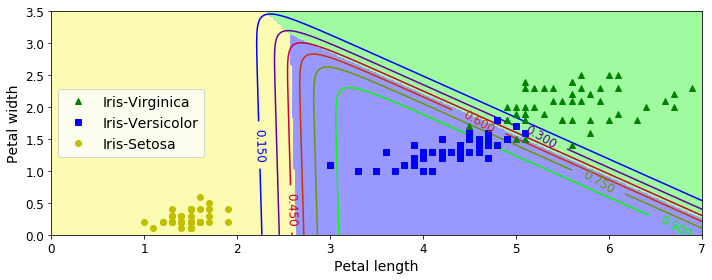

In [104]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
save_fig("softmax_regression_contour_plot")
plt.show()

In [106]:
softmax_predict = softmax_reg.predict([[5, 2]])
print(softmax_predict)

[2]


In [107]:
softmax_predict_classes = softmax_reg.predict_proba([[5, 2]])
print(softmax_predict_classes)

[[6.33134077e-07 5.75276067e-02 9.42471760e-01]]
